### sklearn.cluster.MeanShift
* class sklearn.cluster.MeanShift(*, bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)
#### sklearn.cluster.estimate_bandwidth
* sklearn.cluster.estimate_bandwidth(X, *, quantile=0.3, n_samples=None, random_state=0, n_jobs=None)

In [4]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [5]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

print(clusterDF.shape)
clusterDF.head(3)

(200, 3)


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


In [6]:
from sklearn.cluster import MeanShift , estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print(bandwidth)


2.0022669597980554


In [7]:
meanshift = MeanShift()
meanshift.fit(X)

MeanShift()

In [8]:
meanshift.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

In [9]:
meanshift = MeanShift(bandwidth=1)
meanshift.fit(X)

MeanShift(bandwidth=1)

In [12]:
cluster_labels = meanshift.labels_

In [20]:
clusterDF['cluster_labels'] = cluster_labels

In [21]:
clusterDF.head(3)

,ftr1,ftr2,target,cluster_labels
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0


In [15]:
centers = meanshift.cluster_centers_

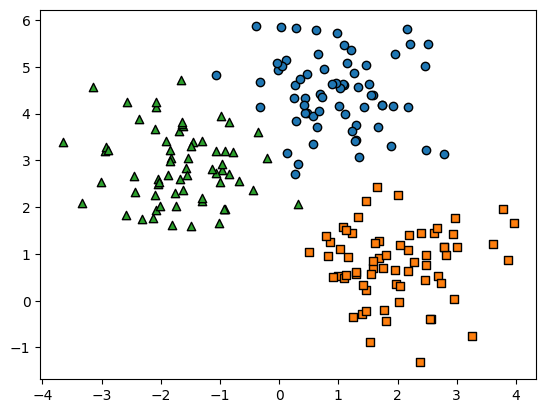

In [18]:
import matplotlib.pyplot as plt
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels : 
    label_cluster = clusterDF[clusterDF['target']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k', marker=markers[label])

plt.show()

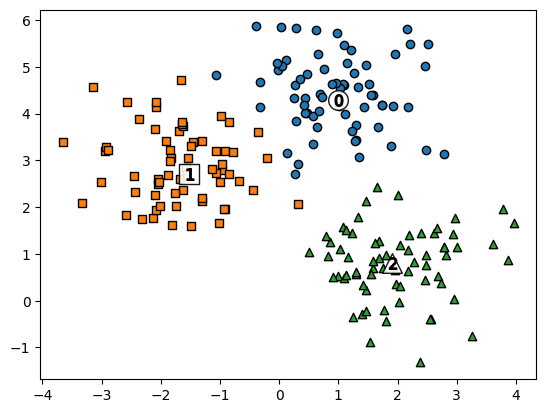

In [23]:
for label in unique_labels : 
    label_cluster = clusterDF[clusterDF['cluster_labels']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color = 'white', alpha=0.9, edgecolors='k', marker = markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color = 'k', edgecolors='k', marker = '$%d$' % label)

plt.show()